In [3]:
import pandas as pd
from scipy.signal import butter, lfilter, welch
from sklearn.decomposition import FastICA
import numpy as np


In [4]:

# Function definitions
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data, axis=0)
    return y

def extract_features(data, fs):
    features = []
    for channel in data.T:  # Transpose to iterate over channels
        # Calculate Power Spectral Density (PSD)
        freqs, psd = welch(channel, fs, nperseg=256)
        log_psd = np.log(psd)  # Use log of PSD values as features
        features.append(log_psd)
    return np.array(features).flatten()



In [5]:
openbci_data_path = "C:/Users/anil_/Russel Emotion Calc/openbci_data.csv"

In [12]:
# Load the CSV file without headers
try:
    data = pd.read_csv(openbci_data_path, header=None, delimiter='\t')
    print("CSV file loaded successfully.")
    print("Data shape before slicing:", data.shape)
except FileNotFoundError:
    print("CSV file not found. Please check the file path.")
    exit()
except ValueError as ve:
    print(f"Error reading CSV file: {ve}")
    exit()

data.head()

CSV file loaded successfully.
Data shape before slicing: (70469, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,-5539.499884,13685.593150,-11434.325449,50077.295313,10137.633698,16856.478674,8288.183306,28324.868181,0.000000,...,96.0,0.0,40.0,126.0,96.0,0.0,0.0,0.0,1.711976e+09,0.0
1,2.0,-11079.156229,28124.104813,-22807.094193,100150.880236,20342.009704,33672.053656,16497.956693,56603.915287,9453.513855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.711976e+09,0.0
2,4.0,-10982.306121,28187.583767,-22742.028265,100143.615919,20566.868254,33623.125687,16301.797784,56538.536434,9526.112321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.711976e+09,0.0
3,6.0,-10992.789089,27362.089141,-22716.547277,100142.543035,20661.684354,33578.668067,16205.417061,56479.840753,9354.316813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.711976e+09,0.0
4,8.0,-10833.510558,26165.287336,-22648.016828,100138.184445,20822.147527,33535.439794,16044.126874,56414.014866,9130.754665,...,96.0,7.5,56.0,0.5,8.0,0.0,0.0,0.0,1.711976e+09,0.0


In [13]:
# Drop the first column (timer)
try:
    data = data.iloc[:, 1:]  # Drop the first column
    print("Data shape after dropping timer column:", data.shape)
except IndexError as ie:
    print("Error dropping timer column:", ie)
    exit()
    
data.head()

Data shape after dropping timer column: (70469, 31)


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,-5539.499884,13685.593150,-11434.325449,50077.295313,10137.633698,16856.478674,8288.183306,28324.868181,0.000000,0.000000,...,96.0,0.0,40.0,126.0,96.0,0.0,0.0,0.0,1.711976e+09,0.0
1,-11079.156229,28124.104813,-22807.094193,100150.880236,20342.009704,33672.053656,16497.956693,56603.915287,9453.513855,2840.325575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.711976e+09,0.0
2,-10982.306121,28187.583767,-22742.028265,100143.615919,20566.868254,33623.125687,16301.797784,56538.536434,9526.112321,2936.438076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.711976e+09,0.0
3,-10992.789089,27362.089141,-22716.547277,100142.543035,20661.684354,33578.668067,16205.417061,56479.840753,9354.316813,2975.687739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.711976e+09,0.0
4,-10833.510558,26165.287336,-22648.016828,100138.184445,20822.147527,33535.439794,16044.126874,56414.014866,9130.754665,3008.142472,...,96.0,7.5,56.0,0.5,8.0,0.0,0.0,0.0,1.711976e+09,0.0


In [14]:
# Take the next 8 columns after dropping the timer column
try:
    data = data.iloc[:, :8]
    print("Data shape after slicing:", data.shape)
except IndexError as ie:
    print("Error slicing data:", ie)
    exit()

data.head()

Data shape after slicing: (70469, 8)


,1,2,3,4,5,6,7,8
0,-5539.499884,13685.593150,-11434.325449,50077.295313,10137.633698,16856.478674,8288.183306,28324.868181
1,-11079.156229,28124.104813,-22807.094193,100150.880236,20342.009704,33672.053656,16497.956693,56603.915287
2,-10982.306121,28187.583767,-22742.028265,100143.615919,20566.868254,33623.125687,16301.797784,56538.536434
3,-10992.789089,27362.089141,-22716.547277,100142.543035,20661.684354,33578.668067,16205.417061,56479.840753
4,-10833.510558,26165.287336,-22648.016828,100138.184445,20822.147527,33535.439794,16044.126874,56414.014866


In [15]:
# Export the processed data to a new CSV file
try:
    data.to_csv('processed_data.csv', index=False, header=False)
    print("Processed data exported to 'processed_data.csv'.")
except Exception as e:
    print(f"Error exporting processed data: {e}")
    exit()

Processed data exported to 'processed_data.csv'.


In [17]:
# Filter parameters
lowcut = 1.0
highcut = 50.0
fs = 250  # Sampling frequency

# Apply bandpass filter
try:
    filtered_data = bandpass_filter(data.values, lowcut, highcut, fs)
    print("Bandpass filter applied successfully.")
    print("Filtered Data Shape:", filtered_data.shape)
except Exception as e:
    print(f"Error during bandpass filtering: {e}")
    exit()
filtered_data

Bandpass filter applied successfully.
Filtered Data Shape: (70469, 8)


array([[ -112.19697856,   277.18787496,  -231.59072011, ...,
          341.41096054,   167.86878674,   573.69161376],
       [ -892.48265758,  2220.16185862, -1840.95941271, ...,
         2714.95126117,  1333.73705159,  4562.54597213],
       [-3202.63743391,  8024.39736696, -6604.71978474, ...,
         9744.64823941,  4779.66094283, 16378.03668259],
       ...,
       [ -810.14333096,    41.91233743,   162.74402765, ...,
           41.44381172,    41.94869553, 21547.00301454],
       [ -800.98655341,    41.46400636,   151.30757652, ...,
           40.97112315,    41.42832593, 12925.45126502],
       [ -793.16625545,    41.49957772,   140.53831704, ...,
           41.00336542,    42.84815852, 14587.6912568 ]])

In [18]:

# Perform ICA
try:
    ica = FastICA(n_components=8, random_state=42)
    ica_data = ica.fit_transform(filtered_data)
    print("ICA applied successfully.")
    print("ICA Data Shape:", ica_data.shape)
except Exception as e:
    print(f"Error during ICA: {e}")
    exit()


ICA applied successfully.
ICA Data Shape: (70469, 8)


In [20]:

# Extract features
try:
    features = extract_features(ica_data, fs)
    print("Features extracted successfully.")
    print("Extracted Features Shape:", features.shape)
except Exception as e:
    print(f"Error during feature extraction: {e}")
    exit()
features

Features extracted successfully.
Extracted Features Shape: (1032,)


array([ -3.05860434,  -1.3791726 ,  -1.40758833, ..., -34.37599796,
       -34.45668755, -35.17788824])

ICA-transformed data (first few rows):
[[ 0.08571032 -0.02463075 -0.02126323 -0.07308802  0.04979181  0.05120298
  -0.02607097 -0.04029772]
 [ 0.68178363 -0.19577336 -0.16914928 -0.58540027  0.3963897   0.4075685
  -0.2073265  -0.32035735]
 [ 2.44780393 -0.70165078 -0.60698076 -2.11596793  1.42310927  1.46508305
  -0.74385948 -1.15008786]
 [ 5.26128764 -1.50477079 -1.30489662 -4.573776    3.05867073  3.15585651
  -1.59693156 -2.47178294]
 [ 7.5979482  -2.16784518 -1.88850981 -6.61832743  4.41757565  4.57471997
  -2.30139093 -3.5687854 ]]
Statistical summary of extracted features:
Mean: -14.114395004008333
Standard Deviation: 9.469652460543255
Percentile (25th, 50th, 75th): [-21.04869084  -9.70034037  -6.64216011]


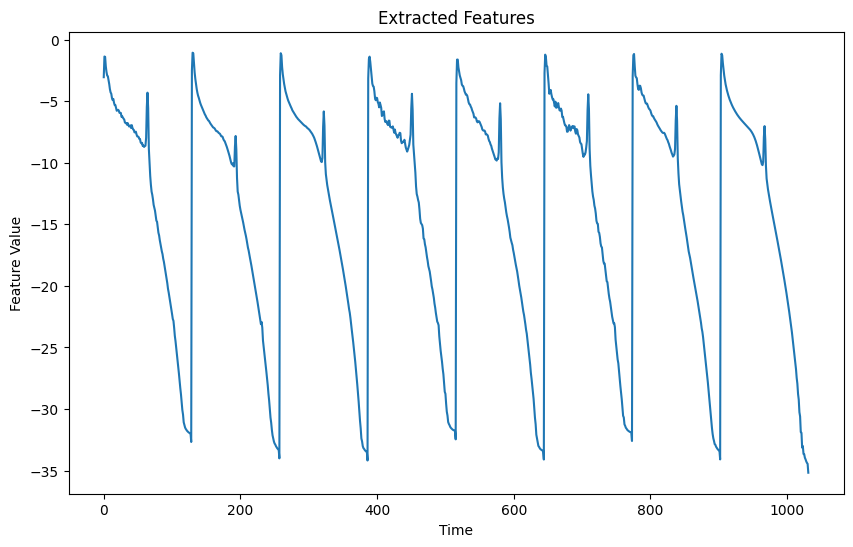

In [21]:

# Print ICA-transformed data
print("ICA-transformed data (first few rows):")
print(ica_data[:5])

# Display statistical summaries of features
print("Statistical summary of extracted features:")
print("Mean:", np.mean(features))
print("Standard Deviation:", np.std(features))
print("Percentile (25th, 50th, 75th):", np.percentile(features, [25, 50, 75]))

# Visualize features (if applicable)
# For example, if features represent a time series, you can plot them:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(features)
plt.title('Extracted Features')
plt.xlabel('Time')
plt.ylabel('Feature Value')
plt.show()